<a href="https://colab.research.google.com/github/Alex-Gnn2813/Projects-Profession-AI-Data-Analytics-course/blob/main/Alessia_Giannalia__Filtro_per_Fake_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The dataset

In [ ]:
!wget https://proai-datasets.s3.eu-west-3.amazonaws.com/fake_news.zip
!unzip fake_news.zip

In [ ]:
import pandas as pd
import gensim.corpora as corpora
import gensim.models

df_true = pd.read_csv("True.csv")
df_fake = pd.read_csv("Fake.csv")

###Are fake news more frequent in a certain category?

In [ ]:
"""
We count how many articles are present in each category
and calculate their percentage of the total.
"""
values=(df_fake["subject"].value_counts()/len(df_fake["subject"]))*100

for subject, percentage in values.items():
  print(f"{subject:<18}{percentage:.2f} %")

News              38.54 %
politics          29.13 %
left-news         18.99 %
Government News   6.69 %
US_News           3.33 %
Middle-east       3.31 %


###For each category, are there topics that are more subject to fake news?

In [ ]:
import nltk
!python -m spacy download en_core_web_sm
nltk.download("stopwords")
from nltk.corpus import stopwords

In [ ]:
"""
Function to clean our data.
"""
from gensim.utils import simple_preprocess

def sent_to_words(items):
  for i in items:
    yield(simple_preprocess(i,deacc=True))

"""
This function eliminates stopwords.
"""
stopwords=stopwords.words("english")

def remove_stopwords(texts):
  return[[i for i in words if i not in stopwords] for words in texts]

"""
This function implements an LDA model
to find the topics.
"""
def category_topic(df_,passes=3):

  text_cl=remove_stopwords(list(sent_to_words(df_)))
  id2word=corpora.Dictionary(text_cl)
  corpus=[id2word.doc2bow(i) for i in text_cl]
  lda_model=gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=6,
                                       passes=passes,
                                       random_state=42
                                       )
  return corpus,lda_model

"""
This function counts how many documents
are part of a topic.
"""
def num_doc(corpus,lda_model):

  topic_counts={}
  for i in corpus:
    doc_topics=lda_model.get_document_topics(i)
    dom_topic=max(doc_topics, key=lambda x: x[1])[0]
    if dom_topic not in topic_counts:
      topic_counts[dom_topic]= 0
    topic_counts[dom_topic] += 1
  for topic,count in topic_counts.items():
    print(f"Topic {topic}: {count} documents")

  return  topic_counts

In [ ]:
news= df_fake[df_fake["subject"]=="News"]
politics= df_fake[df_fake["subject"]=="politics"]
left_news= df_fake[df_fake["subject"]=="left-news"]
government_news= df_fake[df_fake["subject"]=="Government News"]
us_news= df_fake[df_fake["subject"]=="US_News"]
middle_east= df_fake[df_fake["subject"]=="Middle-east"]

Let's see how many documents are part of each topic found:

 (the following six cells take about 7 minutes in total)

In [ ]:
corpus,lda_model=category_topic(news["text"])
news_nd=num_doc(corpus,lda_model)

Topic 5: 3398 documents
Topic 3: 1512 documents
Topic 1: 1040 documents
Topic 0: 1096 documents
Topic 4: 1587 documents
Topic 2: 417 documents


In [ ]:
corpus,lda_model=category_topic(politics["text"])
politics_nd=num_doc(corpus,lda_model)

Topic 5: 830 documents
Topic 0: 1230 documents
Topic 2: 1506 documents
Topic 1: 692 documents
Topic 4: 1879 documents
Topic 3: 704 documents


In [ ]:
corpus,lda_model=category_topic(left_news["text"],passes=5)
left_news_nd=num_doc(corpus,lda_model)

Topic 3: 2159 documents
Topic 5: 498 documents
Topic 1: 560 documents
Topic 4: 347 documents
Topic 0: 722 documents
Topic 2: 173 documents


In [ ]:
corpus,lda_model=category_topic(government_news["text"],passes=10)
gov_news_nd=num_doc(corpus,lda_model)

Topic 4: 145 documents
Topic 3: 225 documents
Topic 0: 276 documents
Topic 2: 416 documents
Topic 5: 344 documents
Topic 1: 164 documents


In [ ]:
corpus,lda_model=category_topic(us_news["text"],passes=10)
us_news_nd=num_doc(corpus,lda_model)

Topic 0: 98 documents
Topic 1: 170 documents
Topic 2: 207 documents
Topic 4: 144 documents
Topic 3: 55 documents
Topic 5: 109 documents


In [ ]:
corpus,lda_model=category_topic(middle_east["text"],passes=10)
middle_east_nd=num_doc(corpus,lda_model)

Topic 0: 105 documents
Topic 3: 259 documents
Topic 1: 78 documents
Topic 4: 182 documents
Topic 5: 121 documents
Topic 2: 33 documents


In [ ]:
"""
Now, we extract only the "names"
of the topics with the maximum values:
"""
n_topic=[news_nd, politics_nd, left_news_nd, gov_news_nd, us_news_nd, middle_east_nd]
name=["News","politics","left-news","Government News","US_News","Middle-east"]
print("For each category, the topics most subject to fake news are:")

for i, category in enumerate(n_topic):
    max_= max(category.values())
    keys_=([keys_ for keys_, value in category.items() if value == max_])
    print(f"• {name[i]:<18} ⇢ {keys_}")

For each category, the topics most subject to fake news are:
• News               ⇢ [5]
• politics           ⇢ [4]
• left-news          ⇢ [3]
• Government News    ⇢ [2]
• US_News            ⇢ [2]
• Middle-east        ⇢ [3]


###Do fake news title have patterns?

In [ ]:
"""
To answer this question we will try to look for the most common words:
"""
from collections import Counter

text_cl=remove_stopwords(list(sent_to_words(df_fake["title"])))
tokens = [i for text in text_cl for i in text]
word_frequency = Counter(tokens)
word_frequency=word_frequency.most_common(10)
for i in word_frequency:
  print(f" • {i[0]:<9} ⇢  {i[1]} times")

 • trump     ⇢  9339 times
 • video     ⇢  8477 times
 • obama     ⇢  2582 times
 • hillary   ⇢  2322 times
 • watch     ⇢  1937 times
 • president ⇢  1146 times
 • clinton   ⇢  1138 times
 • new       ⇢  905 times
 • black     ⇢  896 times
 • breaking  ⇢  896 times


In [ ]:
"""
Function to calculate co-occurrences
"""
import re
from collections import defaultdict

def co_occurrences(titoli):
    co_occurrences=defaultdict(int)
    for words in titoli:
        for i, words1 in enumerate(words):
            for j in range(i+1, len(words)):
                words2 = words[j]
                pairs=tuple(sorted([words1, words2]))
                co_occurrences[pairs] += 1
    return co_occurrences

In [ ]:
"""
We also look for recurring groups of words.
We only consider recurring greater than 500.
"""
co_occurrences=co_occurrences(text_cl)

for pairs, frequency in sorted(co_occurrences.items(), key=lambda x: x[1], reverse=True):
  if frequency > 500:
    print(f" • {pairs[0]:<9} &  {pairs[1]:<8} ⇢  {frequency} times")

 • trump     &  video    ⇢  3468 times
 • hillary   &  video    ⇢  1008 times
 • trump     &  watch    ⇢  986 times
 • obama     &  video    ⇢  923 times
 • donald    &  trump    ⇢  868 times
 • president &  trump    ⇢  857 times
 • video     &  watch    ⇢  682 times
 • obama     &  trump    ⇢  621 times
 • clinton   &  hillary  ⇢  556 times
 • hillary   &  trump    ⇢  529 times
 • trump     &  trump    ⇢  523 times
 • president &  video    ⇢  514 times


#Model

In [ ]:
"""
Let's train a classification model with MLPClassifier
(takes about 32 minutes).
"""
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier

df_true['label'] = 0
df_fake['label'] = 1

df_combined=pd.concat([df_true, df_fake], axis=0)
df_combined=df_combined.sample(frac=1).reset_index(drop=True)

text=pd.Series(remove_stopwords(list(sent_to_words(df_combined['text']))))
text=text.apply(lambda x: ' '.join(x))

X_train, X_test, y_train, y_test=train_test_split(text, df_combined['label'],
                                                  test_size=0.3,
                                                  random_state=42)

vectorizer=TfidfVectorizer()
X_train_tfidf=vectorizer.fit_transform(X_train)
X_test_tfidf=vectorizer.transform(X_test)

clf = MLPClassifier(activation='logistic',
                    hidden_layer_sizes=(100,),
                    max_iter=100,
                    solver='adam',
                    tol=0.005,
                    verbose=True,
                    )

clf.fit(X_train_tfidf, y_train)
y_pred = clf.predict(X_test_tfidf)


Iteration 1, loss = 0.53715098
Iteration 2, loss = 0.23080165
Iteration 3, loss = 0.12635075
Iteration 4, loss = 0.08494434
Iteration 5, loss = 0.06239132
Iteration 6, loss = 0.04841594
Iteration 7, loss = 0.03916980
Iteration 8, loss = 0.03268316
Iteration 9, loss = 0.02808499
Iteration 10, loss = 0.02460131
Iteration 11, loss = 0.02196049
Iteration 12, loss = 0.01986426
Iteration 13, loss = 0.01813994
Iteration 14, loss = 0.01675649
Iteration 15, loss = 0.01557957
Iteration 16, loss = 0.01460975
Iteration 17, loss = 0.01377600
Iteration 18, loss = 0.01304441
Iteration 19, loss = 0.01240023
Training loss did not improve more than tol=0.005000 for 10 consecutive epochs. Stopping.


Now let's calculate some metrics to make sure the model works:

In [ ]:
"""
Calculate: accuracy, precision, recall and F1-score
"""
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy*100:.2f}%")
print("\n================================\n")
print(f"Precision: {precision:.4f}")
print("\n================================\n")
print(f"Recall: {recall:.4f}")
print("\n================================\n")
print(f"F1-Score: {f1:.4f}")
print("\n================================\n")

"""
We compare the root mean square error (RMSE),
the mean square error (MSE), and the coefficient
of determination ((R^2)).
"""
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score

def evaluate_model(model,dataset):
  X,y=dataset
  y_pred=model.predict(X)
  print(f"RMSE: {np.sqrt(mean_squared_error(y,y_pred)):.3f}")
  print(f"MSE: {mean_squared_error(y,y_pred):.2f}")
  print(f"R2: {r2_score(y,y_pred):.3f}")
  return r2_score(y,y_pred) , np.sqrt(mean_squared_error(y,y_pred))

print("Train:")
r2,_=evaluate_model(clf,(X_train_tfidf,y_train))
print("\n================================\n")
print("Test:")
r22,_=evaluate_model(clf,(X_test_tfidf,y_test))
print("\n================================\n")
print(f"The difference between the 'train' and 'test' is: {1-(r22/r2):.3f} that is {(1-(r22/r2))*100:.1f} %\n\n")



Accuracy: 98.83%


Precision: 0.9888


Recall: 0.9888


F1-Score: 0.9888


Train:
RMSE: 0.006
MSE: 0.00
R2: 1.000


Test:
RMSE: 0.108
MSE: 0.01
R2: 0.953


The difference between the 'train' and 'test' is: 0.047 that is 4.7 %




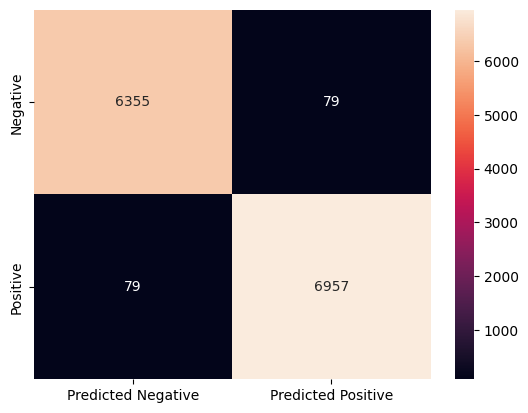

In [ ]:
"""
Visualizziomo la matrice di confusione
"""
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)
df_cm=pd.DataFrame(cm, index=["Negative","Positive"],columns=["Predicted Negative","Predicted Positive"])
sns.heatmap(df_cm, annot=True, fmt="g")
plt.show()

Now let's save the model

In [ ]:
"""
Let's save the MLP model and the TfidfVectorizer
"""
import pickle

with open("mlp_fakenews_classifier.pkl", "wb") as model_fakenews_pkl:
    pickle.dump(clf, model_fakenews_pkl, protocol=pickle.HIGHEST_PROTOCOL)

with open("tfidf_fakenews_vectorizer.pkl", "wb") as vectorizer_fakenews_pkl:
    pickle.dump(vectorizer, vectorizer_fakenews_pkl, protocol=pickle.HIGHEST_PROTOCOL)
